# Optimización de Hiperparámetros

¡Gracias Martín Gonella por la creación de los contenidos de este encuentro!


Comenzamos a trabajar con Optimización de Hiperparámetros en Python con Scikit-Learn, para ello vamos a empezar con ejemplo guiado usando como conjunto de datos el mismo dataset que en el Notebook anterior, Breast Cancer Wisconsin (diagnostic) dataset . Al finalizar, proponemos un análisis similar, pero con otro conjunto de datos. 

## 1. Breast Cancer Wisconsin (diagnostic) dataset

In [1]:
import pandas as pd
import numpy as np
import scipy as sp

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

**Para investigar:** ¿Reconoces todas las librerías que acabamos de importar y sus objetos? Si no es así, recuerda simpre leer la documentación.

Importamos el dataset así como hicimos en el notebook anterior.

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

Si observan la variable `data`, podrán notar que es un `diccionario`, por lo tanto vamos a proceder a convertirlo en un `DataFrame` de Pandas.

In [3]:
df = pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))

Y, como ya lo exploramos, simplemente vamos a seleccionar los atributos que utilizaremos.

In [4]:
features_mean = list(df.columns[0:10])
features_mean

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension']

In [5]:
data = df[features_mean + ['target']]
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.0


Procedemos a separar los `features` del `target`, para luego poder dividir los datos en conjunto de `train` y `test`.

In [6]:
X = data.drop(['target'],axis=1)
y = data['target']

# Dividimos los datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Genial, ¡ya tenemos listos nuestros datos!

Ahora vamos a escoger un modelo de clasificación, vamos con un `KNeighborsClassifier`. Luego, puedes probar con algún otro clasificador.

In [7]:
knn = KNeighborsClassifier()

Como recordarás de la bitácora, vimos tres estrategias para realizar una optimización de hiperparámetros:

    * Manual.
    * Por grilla.
    * Aleatoria.
    
Como ya mencionamos la búsqueda manual puede resultar muy tediosa y poco eficiente, por lo tanto vamos a probar con las dos restantes: **aleatoria** y por **grilla**. Además, ya tenemos una idea del desempeño de estos modelos sobre este dataset del encuentro anterior.

### 1.1 Grid Search

Definamos las grillas que necesitamos para el `GridSearchCV`. ¿Que tipo de objeto - desde el punto de vista de la programación - es? Prestar atención también qué tipo de datos usamos para cada hiperparámetro. Como siempre, mirar la documentación de la clase.

In [8]:
# Grilla para Grid Search
param_grid = {'n_neighbors':np.arange(1, 20),
              'weights': ['uniform', 'distance'], 
              'leaf_size':[1,3,5,7,10],
              'algorithm':['auto', 'kd_tree']}

Una vez definida la grilla, ya podemos entrenar el modelo. 

In [9]:
# ESTRATEGIA 1: Grid Search
model = GridSearchCV(knn, param_grid=param_grid, cv=5)

# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 3, 5, 7, 10],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']})

Genial, ya tenemos entrenado nuestro modelo KNN para una grilla de hiperparámetros. Además, dichas búsquedas por grilla vienen acompañadas de un validación cruzada, por lo cuál también hemos validado correctamente cada modelo con su correspondiente configuración de hiperparámetros.

<img src="https://media.giphy.com/media/rVbAzUUSUC6dO/giphy.gif" width="400" />

**Pero, ¿Cómo elijo la mejor configuración? ¿Cuál es la mejor performance? ¿Y el resto de los resultados?**

**Pista:** La respuesta correcta siempre se encuentra en la documentación.

Existen 3 atributos del modelo (clase de la librería sklearn) que nos van a ayudar a responder éstas preguntas: `best_params_`, `best_score_` y `cv_results_`

**Para investigar:** Antes de continuar con la ejecución de la notebbok, lee un poco más acerca de la documentación en general de [`GridSearchCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) y [`RandomizedSearchCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) y en particular sobre los 3 atributos que acabamos de mencionar.

<img src="https://media.giphy.com/media/2k8EwXEwhoQGQ/giphy.gif" width="400" />

In [10]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

Mejores parametros: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 18, 'weights': 'uniform'}
Mejor Score: 0.8872777017783857



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007977,0.004505,0.007979,2.523042e-03,auto,1,1,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.895349,0.858824,0.858824,0.823529,0.800000,0.847305,0.032792,341
1,0.008377,0.002239,0.004389,1.196933e-03,auto,1,1,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.895349,0.858824,0.858824,0.823529,0.800000,0.847305,0.032792,341
2,0.003989,0.001093,0.005784,7.465191e-04,auto,1,2,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.895349,0.835294,0.847059,0.835294,0.811765,0.844952,0.027685,371
3,0.003789,0.000746,0.002992,5.917394e-07,auto,1,2,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.895349,0.858824,0.858824,0.823529,0.800000,0.847305,0.032792,341
4,0.004188,0.000746,0.005785,7.470796e-04,auto,1,3,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.895349,0.894118,0.941176,0.811765,0.870588,0.882599,0.042162,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.004986,0.001410,0.003990,6.309783e-04,kd_tree,10,17,distance,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.895349,0.870588,0.941176,0.835294,0.870588,0.882599,0.034986,31
376,0.005584,0.001492,0.008778,1.933684e-03,kd_tree,10,18,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.906977,0.870588,0.952941,0.835294,0.870588,0.887278,0.039898,1
377,0.003192,0.000398,0.003390,1.352811e-03,kd_tree,10,18,distance,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.895349,0.882353,0.941176,0.835294,0.870588,0.884952,0.034491,11
378,0.003391,0.000798,0.004994,1.516567e-05,kd_tree,10,19,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.906977,0.858824,0.952941,0.823529,0.870588,0.882572,0.044139,131


En este DataFrame están todos los resultados que devuelve `GridSearchCV()`. Hay mucha información para explorar, pero corre las siguientes celdas antes de hacerlo.

Ya leímos la documentación y por lo tanto ya sabemos que podemos predecir con el mejor modelo de la siguiente manera:

In [11]:
#Predecimos en los datos de test
prediction = model.predict(X_test)

¿Por qué predecimos sobre el conjunto de test?¿Estuvo involucrado este conjunto en el entrenamiento del modelo?

In [12]:
# Matriz de Confusion
cm = confusion_matrix(y_test,prediction)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[44 10]
 [ 1 88]]


In [13]:
print('Exactitud:', accuracy_score(y_test, prediction))

Exactitud: 0.9230769230769231


In [14]:
# Reporte de Clasificacion
report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.98      0.81      0.89        54
         1.0       0.90      0.99      0.94        89

    accuracy                           0.92       143
   macro avg       0.94      0.90      0.92       143
weighted avg       0.93      0.92      0.92       143



**Para pensar**: ¿mejoró el desempeño del modelo con respecto a lo que hicimos en la bitácora anterior?¿Qué otros hiperparámetros puedes explorar para ver si mejora el desempeñó?¿Se puede hacer una mejor exploración de los resultados de `GridSearchCV`? Ahora sí, tómate un tiempo para explorar toda la información que devuelve.

**Ejercicio - Challenge:** Repite lo que hicimos, pero para un árbol de decisión. Algunos hiperparámetros que pueden ser interesantes de explorar, en este caso, son: `criterion`, `max_depth`, `min_samples_split` y `min_samples_leaf`.

In [15]:
tree = DecisionTreeClassifier()

In [16]:
# Grilla para Grid Search
param_grid = {'criterion' : ['gini', 'entropy'],
              'max_depth' : [2,4,6,8,10,12], 
              'min_samples_split' : [2,4,5,6,7,8,10]}

In [17]:
# ESTRATEGIA 1: Grid Search
model = GridSearchCV(tree, param_grid=param_grid, cv=5)

# Entrenamos: Tree con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_split': [2, 4, 5, 6, 7, 8, 10]})

In [18]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

Mejores parametros: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 6}
Mejor Score: 0.93890560875513



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003590,0.001195,0.001795,3.974920e-04,gini,2,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.895349,0.917647,0.917647,0.894118,0.917647,0.908482,0.011232,51
1,0.002593,0.000489,0.001795,7.465443e-04,gini,2,4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.895349,0.929412,0.917647,0.894118,0.917647,0.910834,0.013836,43
2,0.002992,0.000631,0.001994,6.315052e-04,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.895349,0.917647,0.917647,0.894118,0.917647,0.908482,0.011232,51
3,0.002992,0.000631,0.002393,1.492464e-03,gini,2,6,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.895349,0.917647,0.917647,0.894118,0.917647,0.908482,0.011232,51
4,0.002793,0.000399,0.001795,7.465063e-04,gini,2,7,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.895349,0.917647,0.917647,0.894118,0.917647,0.908482,0.011232,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.004387,0.000799,0.001596,4.884609e-04,entropy,12,5,"{'criterion': 'entropy', 'max_depth': 12, 'min...",0.930233,0.929412,0.894118,0.905882,0.835294,0.898988,0.034727,73
80,0.003988,0.000892,0.001596,4.884609e-04,entropy,12,6,"{'criterion': 'entropy', 'max_depth': 12, 'min...",0.941860,0.941176,0.894118,0.905882,0.847059,0.906019,0.035039,62
81,0.003998,0.000631,0.001597,4.889874e-04,entropy,12,7,"{'criterion': 'entropy', 'max_depth': 12, 'min...",0.941860,0.941176,0.882353,0.882353,0.835294,0.896607,0.040497,80
82,0.003780,0.000396,0.001995,1.193046e-06,entropy,12,8,"{'criterion': 'entropy', 'max_depth': 12, 'min...",0.953488,0.929412,0.882353,0.882353,0.847059,0.898933,0.037805,76


In [19]:
#Predecimos en los datos de test
prediction = model.predict(X_test)

In [20]:
# Matriz de Confusion
cm = confusion_matrix(y_test,prediction)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[47  7]
 [ 0 89]]


In [21]:
print('Exactitud:', accuracy_score(y_test, prediction))

Exactitud: 0.951048951048951


In [22]:
# Reporte de Clasificacion
report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93        54
         1.0       0.93      1.00      0.96        89

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



### 1.2 Random Search

La metodología es muy parecida. La principal diferencia radica en que, para crear la grilla, ya no debemos pasar valores para los hiperparámetros, sino un generador aleatorio para cada atributo, en aquellos atributos que queremos que explore aleatoriamente.

In [23]:
# Grilla para Random Search
param_dist = {'n_neighbors':sp.stats.randint(1, 20),
              'weights': ['uniform', 'distance'], 
              'leaf_size':sp.stats.randint(1, 10),
              'algorithm':['auto', 'kd_tree']}

Presta atenció a la documentación, para entender qué hace (es un poco larga, con el comienzo es suficiente):

In [24]:
#help(sp.stats.randint)

Ya podemos entrenar nuestro modelo. Presta atención al parámetro `n_iter`.

In [25]:
# ESTRATEGIA 2: Random Search
model = RandomizedSearchCV(knn, param_dist,n_iter=100, random_state=0, cv=5)

# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   param_distributions={'algorithm': ['auto', 'kd_tree'],
                                        'leaf_size': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000252C1471E20>,
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000252C1478700>,
                                        'weights': ['uniform', 'distance']},
                   random_state=0)

In [26]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

Mejores parametros: {'algorithm': 'kd_tree', 'leaf_size': 1, 'n_neighbors': 18, 'weights': 'uniform'}
Mejor Score: 0.8872777017783857



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003796,0.001177,0.003982,0.000883,auto,6,1,distance,"{'algorithm': 'auto', 'leaf_size': 6, 'n_neigh...",0.895349,0.858824,0.858824,0.823529,0.800000,0.847305,0.032792,88
1,0.003798,0.001179,0.002984,0.000018,kd_tree,4,8,distance,"{'algorithm': 'kd_tree', 'leaf_size': 4, 'n_ne...",0.895349,0.882353,0.941176,0.823529,0.870588,0.882599,0.038020,8
2,0.003390,0.000797,0.006383,0.001197,kd_tree,6,19,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 6, 'n_ne...",0.906977,0.858824,0.952941,0.823529,0.870588,0.882572,0.044139,36
3,0.004587,0.001492,0.006982,0.002092,kd_tree,7,13,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 7, 'n_ne...",0.895349,0.870588,0.941176,0.823529,0.858824,0.877893,0.039197,57
4,0.004587,0.000798,0.005187,0.001934,kd_tree,7,8,distance,"{'algorithm': 'kd_tree', 'leaf_size': 7, 'n_ne...",0.895349,0.882353,0.941176,0.823529,0.870588,0.882599,0.038020,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.003193,0.000749,0.003198,0.000755,auto,6,12,distance,"{'algorithm': 'auto', 'leaf_size': 6, 'n_neigh...",0.895349,0.882353,0.941176,0.823529,0.870588,0.882599,0.038020,8
96,0.003988,0.001069,0.003183,0.000737,auto,3,14,distance,"{'algorithm': 'auto', 'leaf_size': 3, 'n_neigh...",0.895349,0.882353,0.941176,0.823529,0.858824,0.880246,0.039040,49
97,0.004385,0.001019,0.003790,0.000978,kd_tree,7,11,distance,"{'algorithm': 'kd_tree', 'leaf_size': 7, 'n_ne...",0.895349,0.870588,0.941176,0.823529,0.870588,0.880246,0.038325,47
98,0.007181,0.000977,0.010573,0.001494,auto,1,4,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.872093,0.870588,0.917647,0.800000,0.858824,0.863830,0.037708,84


¿Encontró algo parecido a Grid Search?¿Fue más rápido?

In [27]:
#Predecimos en los datos de test
prediction = model.predict(X_test)

In [28]:
# Matriz de Confusion
cm = confusion_matrix(y_test,prediction)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[44 10]
 [ 1 88]]


In [ ]:
print('Exactitud:', accuracy_score(y_test, prediction))

In [29]:
# Reporte de Clasificacion
report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.98      0.81      0.89        54
         1.0       0.90      0.99      0.94        89

    accuracy                           0.92       143
   macro avg       0.94      0.90      0.92       143
weighted avg       0.93      0.92      0.92       143



---
## Se acabo la parte guiada, ahora es tú turno...

<img src="https://www.mememaker.net/api/bucket?path=static/img/memes/full/2020/Jan/6/10/now-it-s-your-turn-15161.png" width="400" />
    
Ahora es tú turno de aplicar todo lo aprendido con un nuevo conjunto de datos. Para ello, vamos a generarlo de manera artificial usando la función [make_classification()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) de sklearn.

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100000, n_features=4, n_informative=4,
                           n_redundant=0, n_clusters_per_class=1,
                           class_sep=1.0, random_state=40)

In [31]:
df = pd.DataFrame()

for i in range(X.shape[1]):
    df['x' + str(i)] = X[:,i]
df['y'] = y 
df.head()

,x0,x1,x2,x3,y
0,-0.292624,-0.783805,-3.849876,-1.758806,1
1,1.629085,-1.059597,-1.654043,0.431430,0
2,-1.504583,0.351320,-1.838668,-0.418151,1
3,1.093868,-1.616160,1.727165,1.464183,0
4,-1.081868,0.864286,0.838435,-4.457802,1


Exploremos un poco el dataset con el que vamos a trabajar.

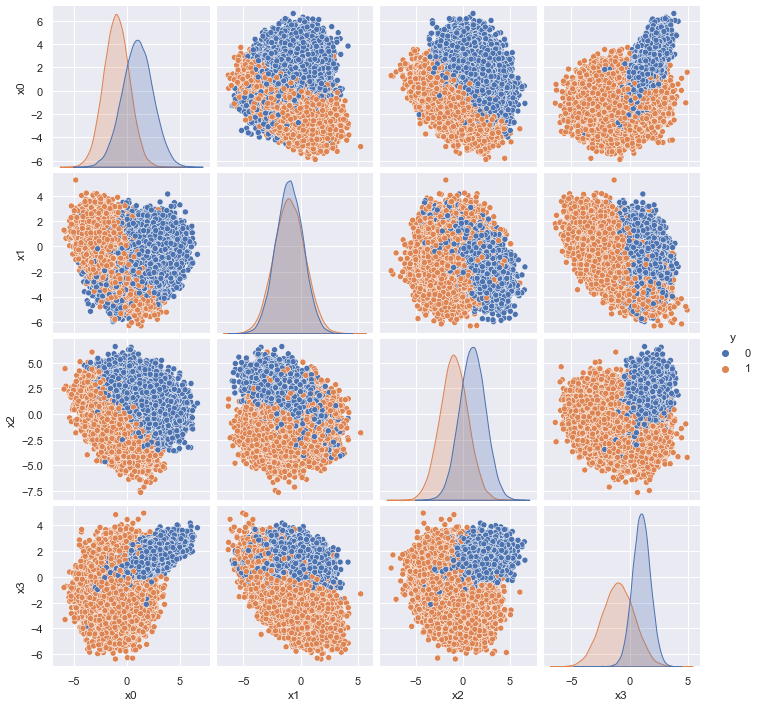

In [32]:
sns.pairplot(data = df, vars = df.columns[:-1], hue = 'y');

**Ejercicios:**
1. Explora el espacio de hiperparámetros con `Grid Search` de un árbol de decisión, entrenado con el dataset artificial antes mencionado. Elige aquellos hiperparámetros que maximicen la exactitud. Luego, evalúa la performance en el conjunto de Test y comparala con la obtenida por `Grid Search` ¿Son diferentes? ¿A qué se deberá? 

Algunas recomendaciones útiles:
   * Recuerda que el espacio a explorar es definido a través de un diccionario. Algunas variables que pueden ser interesantes de explorar, en el caso de un árbol de decisión son: `criterion`, `max_depth`, `min_samples_split` y `min_samples_leaf`.
   * Los resultados del `GridSearchCV` se encuentran en un diccionario que se accede con `.cv_results_`. Si quieres conocer las *keys* de ese diccionario, pueden usar `.cv_results_.keys()`
   * `GridSearchCV` entrena al final un modelo utilizando todo el conjunto de entrenamiento, con los mejores parámetros que encontró. Por lo tanto, se puede usar ese modelo para predecir con `.predict()`
   * Les recomendamos tener a mano la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) de `GridSearchCV` en Scikit-Learn.
    
2. Repite el ejercicio 1, pero esta vez evaluando precisión, exhaustividad, F-Score y AUC-ROC. 

**Notar** que se pueden evaluar múltiples métricas a la vez. También notar que si no eligen una métrica por sobre las otras, `GridSearchCV` no puede reentrenar con el mejor modelo. ¿Cómo son los hiperparámetros que maximizan cada métrica? Por ejemplo, compara entre precisión y exhaustividad.

3. **Opcional 1:** repite los ejercicios 1 y 2 pero esta vez utilizando un `Random Search`.
4. **Opcional 2:** Si aún tienes tiempo y ganas, repite para un `clasificador KNN`.

In [33]:
from sklearn.datasets import make_hastie_10_2
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [34]:
df.columns

Index(['x0', 'x1', 'x2', 'x3', 'y'], dtype='object')

In [35]:
X = df.drop('y', axis = 1).values
y = df.y.values

# Dividimos los datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)

In [36]:
X_train.shape

(75000, 4)

<Figure size 720x360 with 0 Axes>

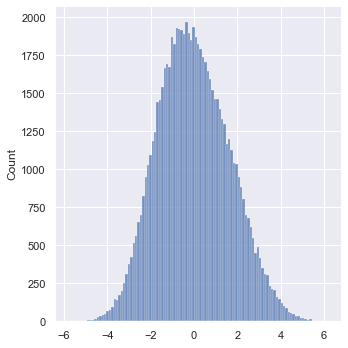

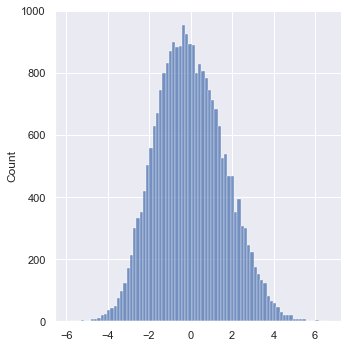

<Figure size 720x360 with 0 Axes>

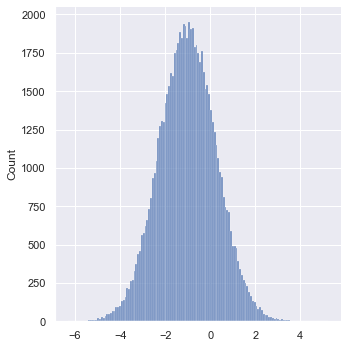

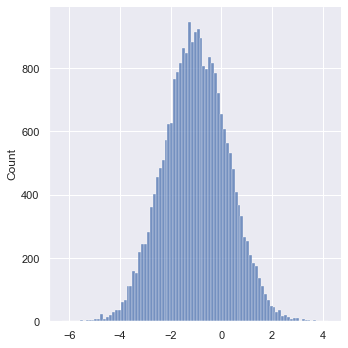

<Figure size 720x360 with 0 Axes>

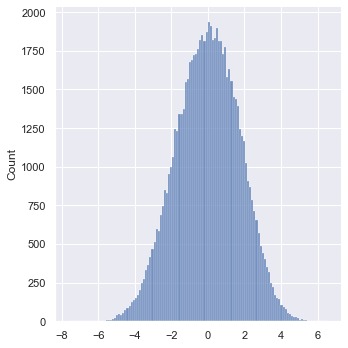

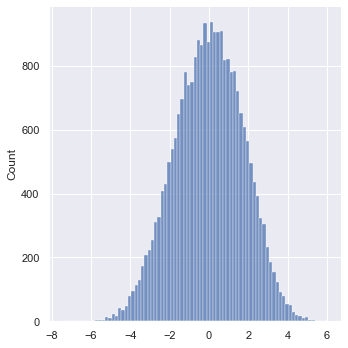

<Figure size 720x360 with 0 Axes>

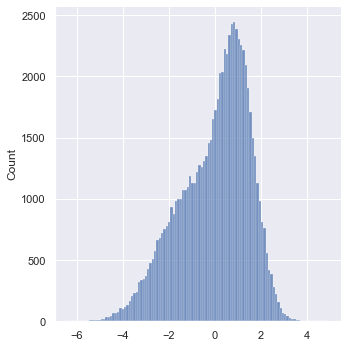

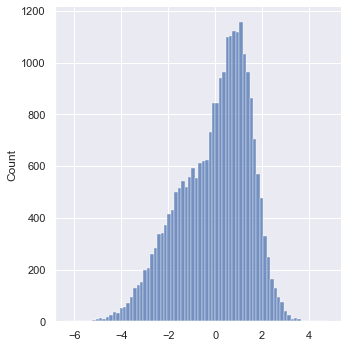

In [37]:
for i in range(X_train.shape[1]):
    plt.figure(figsize=(10,5))
    sns.displot(X_train[:,i])
    sns.displot(X_test[:,i])
    plt.show()

In [38]:
print('Proporcion de etiquetas positiva en los datos de Train: ', y_train.sum()/y_train.size)
print('Proporcion de etiquetas positiva en los datos de Test: ', y_test.sum()/y_test.size)

Proporcion de etiquetas positiva en los datos de Train:  0.50004
Proporcion de etiquetas positiva en los datos de Test:  0.50004


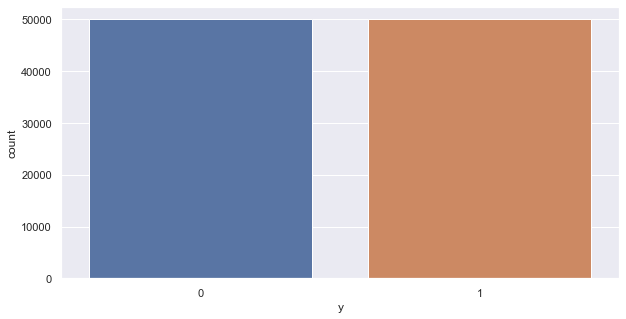

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, x = 'y', label="Count")
plt.show()

In [40]:
np.count_nonzero(y_test == 1)

12501

In [41]:
np.count_nonzero(y_test == 0)

12499

# 1

In [42]:
tree = DecisionTreeClassifier()

In [43]:
# Grilla para Grid Search
param_grid = {'criterion' : ['gini', 'entropy'],
              'max_depth' : [2,4,6,8,10,12], 
              'min_samples_split' : [2,4,5,6,7,8,10]}

In [44]:
# ESTRATEGIA 1: Grid Search
model = GridSearchCV(tree, param_grid=param_grid, cv=5)

# Entrenamos: Tree con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_split': [2, 4, 5, 6, 7, 8, 10]})

In [45]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

Mejores parametros: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 7}
Mejor Score: 0.9583733333333333



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.080388,0.002027,0.001995,4.909339e-07,gini,2,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.872600,0.875667,0.877067,0.874000,0.877933,0.875453,0.001952,71
1,0.095782,0.009393,0.002392,4.901516e-04,gini,2,4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.872600,0.875667,0.877067,0.874000,0.877933,0.875453,0.001952,71
2,0.092982,0.008906,0.002594,4.895525e-04,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.872600,0.875667,0.877067,0.874000,0.877933,0.875453,0.001952,71
3,0.088169,0.009153,0.002194,3.991608e-04,gini,2,6,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.872600,0.875667,0.877067,0.874000,0.877933,0.875453,0.001952,71
4,0.083289,0.005342,0.002008,1.375293e-05,gini,2,7,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.872600,0.875667,0.877067,0.874000,0.877933,0.875453,0.001952,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.545833,0.018680,0.003199,3.916721e-04,entropy,12,5,"{'criterion': 'entropy', 'max_depth': 12, 'min...",0.951800,0.952200,0.956133,0.951533,0.952333,0.952800,0.001691,40
80,0.537352,0.009410,0.003505,4.465473e-04,entropy,12,6,"{'criterion': 'entropy', 'max_depth': 12, 'min...",0.951533,0.952800,0.955667,0.951267,0.953600,0.952973,0.001591,38
81,0.580762,0.048131,0.003791,3.990663e-04,entropy,12,7,"{'criterion': 'entropy', 'max_depth': 12, 'min...",0.951867,0.952267,0.956200,0.952267,0.952867,0.953093,0.001586,33
82,0.542323,0.008912,0.003201,3.946046e-04,entropy,12,8,"{'criterion': 'entropy', 'max_depth': 12, 'min...",0.951200,0.952800,0.956000,0.952000,0.952600,0.952920,0.001638,39


In [46]:
#Predecimos en los datos de test
prediction = model.predict(X_test)

In [47]:
# Matriz de Confusion
cm = confusion_matrix(y_test,prediction)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[11900   599]
 [  453 12048]]


In [48]:
print('Exactitud:', accuracy_score(y_test, prediction))

Exactitud: 0.95792


In [49]:
# Reporte de Clasificacion
report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     12499
           1       0.95      0.96      0.96     12501

    accuracy                           0.96     25000
   macro avg       0.96      0.96      0.96     25000
weighted avg       0.96      0.96      0.96     25000



# 2

In [50]:
tree = DecisionTreeClassifier()

In [51]:
#Metrics for Evualation:
#import sklearn
#sorted(sklearn.metrics.SCORERS.keys())
scoring = {'AUC': 'roc_auc', 'Accuracy': 'accuracy', 'prec': 'precision', 'F-Score': 'f1', 'Recall': 'recall'}

# Grilla para Grid Search
param_grid = {'criterion' : ['gini', 'entropy'],
              'max_depth' : [2,4,6,8,10,12], 
              'min_samples_split' : [2,4,5,6,7,8,10]}

In [52]:
# ESTRATEGIA 1: Grid Search
model = GridSearchCV(tree, param_grid=param_grid, scoring=scoring, refit='AUC', cv=5)

# Entrenamos: Tree con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_split': [2, 4, 5, 6, 7, 8, 10]},
             refit='AUC',
             scoring={'AUC': 'roc_auc', 'Accuracy': 'accuracy', 'F-Score': 'f1',
                      'Recall': 'recall', 'prec': 'precision'})

In [53]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

Mejores parametros: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 6}
Mejor Score: 0.9862039571865328



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_AUC,split1_test_AUC,...,std_test_F-Score,rank_test_F-Score,split0_test_Recall,split1_test_Recall,split2_test_Recall,split3_test_Recall,split4_test_Recall,mean_test_Recall,std_test_Recall,rank_test_Recall
0,0.081986,0.009059,0.022533,0.000804,gini,2,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.913291,0.912118,...,0.001209,71,0.907346,0.902680,0.890948,0.914533,0.901200,0.903341,0.007745,78
1,0.097720,0.007092,0.029091,0.003238,gini,2,4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.913291,0.912118,...,0.001209,71,0.907346,0.902680,0.890948,0.914533,0.901200,0.903341,0.007745,78
2,0.081581,0.006781,0.025356,0.003003,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.913291,0.912118,...,0.001209,71,0.907346,0.902680,0.890948,0.914533,0.901200,0.903341,0.007745,78
3,0.082095,0.006408,0.023332,0.002327,gini,2,6,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.913291,0.912118,...,0.001209,71,0.907346,0.902680,0.890948,0.914533,0.901200,0.903341,0.007745,78
4,0.077595,0.001620,0.022369,0.000503,gini,2,7,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.913291,0.912118,...,0.001209,71,0.907346,0.902680,0.890948,0.914533,0.901200,0.903341,0.007745,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.525211,0.016010,0.028122,0.006246,entropy,12,5,"{'criterion': 'entropy', 'max_depth': 12, 'min...",0.962351,0.964923,...,0.001570,42,0.955073,0.955473,0.955873,0.951333,0.961333,0.955817,0.003200,59
80,0.512522,0.010304,0.028121,0.006248,entropy,12,6,"{'criterion': 'entropy', 'max_depth': 12, 'min...",0.963643,0.965804,...,0.001759,37,0.955606,0.956539,0.957339,0.951600,0.962000,0.956617,0.003338,54
81,0.512816,0.014639,0.024798,0.005901,entropy,12,7,"{'criterion': 'entropy', 'max_depth': 12, 'min...",0.964454,0.966789,...,0.001589,33,0.955206,0.956806,0.957072,0.951867,0.960800,0.956350,0.002896,56
82,0.542198,0.047442,0.029990,0.010185,entropy,12,8,"{'criterion': 'entropy', 'max_depth': 12, 'min...",0.964668,0.968143,...,0.001582,32,0.956139,0.956939,0.956806,0.952667,0.961467,0.956803,0.002804,51


In [54]:
#Predecimos en los datos de test
prediction = model.predict(X_test)

In [55]:
# Matriz de Confusion
cm = confusion_matrix(y_test,prediction)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[11906   593]
 [  476 12025]]


In [56]:
print('Exactitud:', accuracy_score(y_test, prediction))

Exactitud: 0.95724


In [57]:
# Reporte de Clasificacion
report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     12499
           1       0.95      0.96      0.96     12501

    accuracy                           0.96     25000
   macro avg       0.96      0.96      0.96     25000
weighted avg       0.96      0.96      0.96     25000



# 3

## 3.1

In [65]:
tree = DecisionTreeClassifier()

In [66]:
# Grilla para Random Search (Para Desicion Tree)
param_dist = {'criterion' : ['gini', 'entropy'],
              'max_depth' : sp.stats.randint(1, 20), 
              'min_samples_split' : sp.stats.randint(2, 10),
              'min_samples_leaf' : sp.stats.randint(1, 5)}

In [67]:
# ESTRATEGIA 2: Random Search
model = RandomizedSearchCV(tree, param_distributions=param_dist, n_iter=25, random_state=0, cv=5)

# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=25,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000252C2C42E80>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000252C2356370>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000252C23B6400>},
                   random_state=0)

In [68]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

Mejores parametros: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 8}
Mejor Score: 0.9582533333333332



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.425121,0.008450,0.003397,0.000481,gini,16,2,2,"{'criterion': 'gini', 'max_depth': 16, 'min_sa...",0.942867,0.944000,0.948333,0.942200,0.942733,0.944027,0.002232,18
1,0.240303,0.023160,0.002384,0.000478,entropy,4,4,3,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.931333,0.934400,0.934467,0.932533,0.936867,0.933920,0.001888,20
2,0.700999,0.055588,0.003800,0.000379,entropy,19,1,9,"{'criterion': 'entropy', 'max_depth': 19, 'min...",0.945333,0.944467,0.949267,0.945400,0.945733,0.946040,0.001667,17
3,0.385071,0.013057,0.003399,0.000482,gini,13,3,3,"{'criterion': 'gini', 'max_depth': 13, 'min_sa...",0.950933,0.953400,0.957467,0.949867,0.949933,0.952320,0.002874,9
4,0.282643,0.014005,0.002594,0.000489,gini,8,4,8,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.957667,0.958400,0.961200,0.957533,0.956467,0.958253,0.001597,1
5,0.452932,0.010860,0.004183,0.000972,gini,18,2,3,"{'criterion': 'gini', 'max_depth': 18, 'min_sa...",0.941933,0.942667,0.945000,0.940400,0.940267,0.942053,0.001732,19
6,0.469830,0.012040,0.003198,0.000396,entropy,9,2,6,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.957133,0.956800,0.959867,0.956067,0.955667,0.957107,0.001474,3
7,0.628069,0.015034,0.003598,0.000479,entropy,17,4,7,"{'criterion': 'entropy', 'max_depth': 17, 'min...",0.948333,0.946333,0.950000,0.947000,0.949000,0.948133,0.001327,16
8,0.483557,0.048103,0.003591,0.000489,gini,16,4,2,"{'criterion': 'gini', 'max_depth': 16, 'min_sa...",0.948467,0.949800,0.954467,0.947467,0.948600,0.949760,0.002467,12
9,0.155787,0.011511,0.002194,0.000400,gini,4,1,3,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.926867,0.930667,0.926600,0.930867,0.930933,0.929187,0.002007,23


In [69]:
#Predecimos en los datos de test
prediction = model.predict(X_test)

In [70]:
# Matriz de Confusion
cm = confusion_matrix(y_test,prediction)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[11895   604]
 [  444 12057]]


In [72]:
print('Exactitud:', accuracy_score(y_test, prediction))

Exactitud: 0.95808


In [71]:
# Reporte de Clasificacion
report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     12499
           1       0.95      0.96      0.96     12501

    accuracy                           0.96     25000
   macro avg       0.96      0.96      0.96     25000
weighted avg       0.96      0.96      0.96     25000



## 3.2

In [73]:
tree = DecisionTreeClassifier()

In [74]:
#Metrics for Evualation:
#import sklearn
#sorted(sklearn.metrics.SCORERS.keys())
scoring = {'AUC': 'roc_auc', 'Accuracy': 'accuracy', 'prec': 'precision', 'F-Score': 'f1', 'Recall': 'recall'}

# Grilla para Random Search (Para Desicion Tree)
param_dist = {'criterion' : ['gini', 'entropy'],
              'max_depth' : sp.stats.randint(1, 20), 
              'min_samples_split' : sp.stats.randint(2, 10),
              'min_samples_leaf' : sp.stats.randint(1, 5)}

In [75]:
# ESTRATEGIA 2: Random Search
model = RandomizedSearchCV(tree, param_distributions=param_dist, n_iter=25, random_state=0, cv=5, scoring=scoring, refit='AUC')

# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=25,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000252C255AB80>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000252C50E6580>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000252C2407A30>},
                   random_state=0, refit='AUC',
                   scoring={'AUC': 'roc_auc', 'Accuracy': 'accuracy',
                            'F-Score': 'f1', 'Recall': 'recall',
                            'prec': 'precision'})

In [76]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

Mejores parametros: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 8}
Mejor Score: 0.9850666665126754



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_AUC,...,std_test_F-Score,rank_test_F-Score,split0_test_Recall,split1_test_Recall,split2_test_Recall,split3_test_Recall,split4_test_Recall,mean_test_Recall,std_test_Recall,rank_test_Recall
0,0.524523,0.053376,0.029602,0.004211,gini,16,2,2,"{'criterion': 'gini', 'max_depth': 16, 'min_sa...",0.944456,...,0.001985,18,0.935742,0.936808,0.935875,0.927733,0.934400,0.934112,0.003280,22
1,0.248919,0.010370,0.024956,0.001065,entropy,4,4,3,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.974535,...,0.001615,20,0.967338,0.963072,0.959339,0.957867,0.959200,0.961363,0.003453,5
2,0.691061,0.032340,0.026075,0.000548,entropy,19,1,9,"{'criterion': 'entropy', 'max_depth': 19, 'min...",0.957347,...,0.001510,17,0.945074,0.945607,0.946007,0.940800,0.945467,0.944591,0.001919,19
3,0.396025,0.006470,0.029022,0.003620,gini,13,3,3,"{'criterion': 'gini', 'max_depth': 13, 'min_sa...",0.960605,...,0.002948,9,0.952673,0.958006,0.954406,0.947733,0.951867,0.952937,0.003351,13
4,0.274928,0.004523,0.027197,0.003452,gini,8,4,8,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.984654,...,0.001582,1,0.965738,0.964938,0.962538,0.959200,0.960133,0.962510,0.002566,3
5,0.471246,0.012022,0.029011,0.005568,gini,18,2,3,"{'criterion': 'gini', 'max_depth': 18, 'min_sa...",0.946381,...,0.001919,19,0.933875,0.932409,0.932409,0.925067,0.929067,0.930565,0.003170,23
6,0.488784,0.006485,0.026835,0.002526,entropy,9,2,6,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.981416,...,0.001272,3,0.968671,0.962538,0.962138,0.963067,0.962267,0.963736,0.002488,2
7,0.693394,0.072558,0.027261,0.003077,entropy,17,4,7,"{'criterion': 'entropy', 'max_depth': 17, 'min...",0.966695,...,0.001524,16,0.945341,0.944541,0.941608,0.941067,0.951600,0.944831,0.003761,18
8,0.441151,0.008747,0.027362,0.002205,gini,16,4,2,"{'criterion': 'gini', 'max_depth': 16, 'min_sa...",0.961970,...,0.002775,12,0.945741,0.949607,0.947874,0.938533,0.945467,0.945444,0.003770,17
9,0.149014,0.001398,0.023988,0.000841,gini,4,1,3,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.970576,...,0.002235,23,0.931476,0.934409,0.917211,0.931067,0.936267,0.930086,0.006716,24


In [77]:
#Predecimos en los datos de test
prediction = model.predict(X_test)

In [78]:
# Matriz de Confusion
cm = confusion_matrix(y_test,prediction)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[11895   604]
 [  445 12056]]


In [79]:
print('Exactitud:', accuracy_score(y_test, prediction))

Exactitud: 0.95804


In [80]:
# Reporte de Clasificacion
report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     12499
           1       0.95      0.96      0.96     12501

    accuracy                           0.96     25000
   macro avg       0.96      0.96      0.96     25000
weighted avg       0.96      0.96      0.96     25000

